# Assignment 8

## Imports

In [4]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from df_after_transform import df_after_transform
from sklearn import set_config
from sklearn.calibration import CalibrationDisplay
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingClassifier,HistGradientBoostingRegressor
from sklearn.feature_selection import (
    RFECV,
    SelectFromModel,
    SelectKBest,
    SequentialFeatureSelector,
    f_classif,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (Lasso, 
                                 LassoCV, 
                                 LogisticRegression,
                                 Ridge,
                                 LinearRegression
)

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    DetCurveDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    classification_report,
    make_scorer,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC

set_config(display="diagram")  # display='text' is the default

pd.set_option(
    "display.max_colwidth", 1000, "display.max_rows", 50, "display.max_columns", None
)

import warnings

warnings.filterwarnings("ignore")



## Load data

In [6]:
os.getcwd()

'C:\\Users\\micha\\OneDrive\\Documents\\Lehigh\\Classes\\Spring 2024\\FIN 377\\Assignment 8\\asgn-08-michaelparker7'

In [7]:
housing_train = pd.read_csv('submission/input_data2/housing_train.csv')

y_train = np.log(housing_train['v_SalePrice'])
X_train = housing_train.drop(columns = 'v_SalePrice')

In [10]:
X_train

,parcel,v_MS_SubClass,v_MS_Zoning,v_Lot_Frontage,v_Lot_Area,v_Street,v_Alley,v_Lot_Shape,v_Land_Contour,v_Utilities,v_Lot_Config,v_Land_Slope,v_Neighborhood,v_Condition_1,v_Condition_2,v_Bldg_Type,v_House_Style,v_Overall_Qual,v_Overall_Cond,v_Year_Built,v_Year_Remod/Add,v_Roof_Style,v_Roof_Matl,v_Exterior_1st,v_Exterior_2nd,v_Mas_Vnr_Type,v_Mas_Vnr_Area,v_Exter_Qual,v_Exter_Cond,v_Foundation,v_Bsmt_Qual,v_Bsmt_Cond,v_Bsmt_Exposure,v_BsmtFin_Type_1,v_BsmtFin_SF_1,v_BsmtFin_Type_2,v_BsmtFin_SF_2,v_Bsmt_Unf_SF,v_Total_Bsmt_SF,v_Heating,v_Heating_QC,v_Central_Air,v_Electrical,v_1st_Flr_SF,v_2nd_Flr_SF,v_Low_Qual_Fin_SF,v_Gr_Liv_Area,v_Bsmt_Full_Bath,v_Bsmt_Half_Bath,v_Full_Bath,v_Half_Bath,v_Bedroom_AbvGr,v_Kitchen_AbvGr,v_Kitchen_Qual,v_TotRms_AbvGrd,v_Functional,v_Fireplaces,v_Fireplace_Qu,v_Garage_Type,v_Garage_Yr_Blt,v_Garage_Finish,v_Garage_Cars,v_Garage_Area,v_Garage_Qual,v_Garage_Cond,v_Paved_Drive,v_Wood_Deck_SF,v_Open_Porch_SF,v_Enclosed_Porch,v_3Ssn_Porch,v_Screen_Porch,v_Pool_Area,v_Pool_QC,v_Fence,v_Misc_Feature,v_Misc_Val,v_Mo_Sold,v_Yr_Sold,v_Sale_Type,v_Sale_Condition
0,1056_528110080,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400.0,Unf,0.0,310.0,1710.0,GasA,Ex,Y,SBrkr,1710,0,0,1710,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3.0,866.0,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
1,1055_528108150,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,302.0,Gd,TA,PConc,Ex,TA,No,GLQ,1012.0,Unf,0.0,570.0,1582.0,GasA,Ex,Y,SBrkr,1582,0,0,1582,1.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3.0,905.0,TA,TA,Y,209,95,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
2,1053_528104050,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636.0,Unf,0.0,442.0,2078.0,GasA,Ex,Y,SBrkr,2084,0,0,2084,1.0,0.0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3.0,1220.0,TA,TA,Y,188,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,New,Partial
3,2213_909275160,20,RL,126.0,13108,Pave,NaN,IR2,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,5,1951,1951,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,Y,SBrkr,1226,0,0,1226,0.0,0.0,1,1,2,1,TA,7,Min1,1,Gd,Attchd,1951.0,Fin,2.0,400.0,TA,TA,Y,174,24,120,0,228,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1051_528102030,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,426.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1336.0,Unf,0.0,596.0,1932.0,GasA,Ex,Y,SBrkr,1932,0,0,1932,1.0,0.0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,774.0,TA,TA,Y,0,66,0,304,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2524_534125210,190,RL,79.0,13110,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,RRAn,Feedr,2fmCon,1Story,5,6,1972,1972,Gable,CompShg,Plywood,Plywood,BrkFace,144.0,TA,TA,CBlock,Gd,TA,No,GLQ,962.0,Unf,0.0,191.0,1153.0,GasA,Ex,Y,SBrkr,1193,0,0,1193,1.0,0.0,2,0,2,1,TA,6,Typ,0,NaN,Attchd,1972.0,Fin,2.0,501.0,TA,TA,Y,140,153,0,0,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1937,2846_909131125,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,2Story,5,8,1916,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Gd,Y,SBrkr,948,980,0,1928,0.0,0.0,2,0,5,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,228,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1938,2605_535382020,190,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,1.5Fin,5,4,1900,1970,Gable,C

In [ ]:
X_train.isna().sum()

In [42]:
X_train.columns

Index(['parcel', 'v_MS_SubClass', 'v_MS_Zoning', 'v_Lot_Frontage',
       'v_Lot_Area', 'v_Street', 'v_Alley', 'v_Lot_Shape', 'v_Land_Contour',
       'v_Utilities', 'v_Lot_Config', 'v_Land_Slope', 'v_Neighborhood',
       'v_Condition_1', 'v_Condition_2', 'v_Bldg_Type', 'v_House_Style',
       'v_Overall_Qual', 'v_Overall_Cond', 'v_Year_Built', 'v_Year_Remod/Add',
       'v_Roof_Style', 'v_Roof_Matl', 'v_Exterior_1st', 'v_Exterior_2nd',
       'v_Mas_Vnr_Type', 'v_Mas_Vnr_Area', 'v_Exter_Qual', 'v_Exter_Cond',
       'v_Foundation', 'v_Bsmt_Qual', 'v_Bsmt_Cond', 'v_Bsmt_Exposure',
       'v_BsmtFin_Type_1', 'v_BsmtFin_SF_1', 'v_BsmtFin_Type_2',
       'v_BsmtFin_SF_2', 'v_Bsmt_Unf_SF', 'v_Total_Bsmt_SF', 'v_Heating',
       'v_Heating_QC', 'v_Central_Air', 'v_Electrical', 'v_1st_Flr_SF',
       'v_2nd_Flr_SF', 'v_Low_Qual_Fin_SF', 'v_Gr_Liv_Area',
       'v_Bsmt_Full_Bath', 'v_Bsmt_Half_Bath', 'v_Full_Bath', 'v_Half_Bath',
       'v_Bedroom_AbvGr', 'v_Kitchen_AbvGr', 'v_Kitchen_Qual',

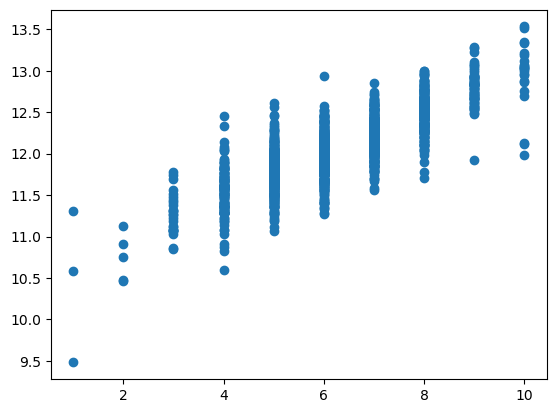

In [43]:
plt.scatter(X_train['v_Overall_Qual'], y_train)

## Preprocessing

In [102]:
# numerical and categorical pipelines
numer_pipe = Pipeline(
    [
        ("imputer",SimpleImputer(strategy='median')),
        ("scaler",StandardScaler()),
        ("polynomial",PolynomialFeatures(degree=2))
    ])

cat_pipe = Pipeline(
    [
        ("encoder",OneHotEncoder(handle_unknown='ignore'))
    ])

# numerical and categorical variables to use
numer_variables = X_train.select_dtypes(include='number').columns
numer_variables = [var for var in numer_variables]

cat_variables = ['v_Lot_Config','v_Neighborhood','v_MS_Zoning','v_Land_Contour','v_Bldg_Type','v_House_Style',
                 'v_Exter_Qual','v_Heating_QC','v_Central_Air','v_Kitchen_Qual','v_Paved_Drive','v_Sale_Condition']

# preprocessing pipeline
preproc_pipe = ColumnTransformer(
    [
        ("numer",numer_pipe,numer_variables),
        ("cat",cat_pipe,cat_variables)
    ],
        remainder='drop')

# preprocessing dataframe
preproc_df = df_after_transform(preproc_pipe,X_train)
print(f"There are {preproc_df.shape[1]} columns in the dataframe")
preproc_df

There are 784 columns in the dataframe


1  v_MS_SubClass  v_Lot_Frontage  v_Lot_Area  v_Overall_Qual  \
0     1.0      -0.887124        1.730884    0.460549        1.346426   
1     1.0      -0.887124        1.320007    0.308958        1.346426   
2     1.0      -0.887124        2.050454    0.577020        2.773740   
3     1.0      -0.887124        2.598290    0.360553       -0.794546   
4     1.0      -0.887124        1.228701    0.275754        1.346426   
...   ...            ...             ...         ...             ...   
1936  1.0       3.072354        0.452602    0.360808       -0.794546   
1937  1.0       3.072354       -0.049581   -0.409024       -0.794546   
1938  1.0       3.072354       -0.414804    0.065800       -0.794546   
1939  1.0       3.072354       -0.643069   -0.587178       -0.794546   
1940  1.0       3.072354       -0.414804    0.333989       -0.794546   

      v_Overall_Cond  v_Year_Built  v_Year_Remod/Add  v_Mas_Vnr_Area  \
0          -0.522693      1.181307          1.148564        1.801615   
1          -0.522693      1.181307          1.100560        1.074734   
2          -0.522693      1.181307          1.148564        3.862921   
3          -0.522693     -0.672866         -1.587616       -0.563462   
4          -0.522693      1.214417          1.148564        1.747370   
...              ...           ...               ...             ...   
1936        0.397114      0.022449         -0.579550        0.217664   
1937        2.236728     -1.831724          0.524523       -0.563462   
1938       -1.442500     -2.361487         -0.675556       -0.563462   
1939        0.397114     -1.964165          0.764538       -0.563462   
1940       -1.442500     -1.699283         -1.635619       -0.563462   

      v_BsmtFin_SF_1  v_BsmtFin_SF_2  v_Bsmt_Unf_SF  v_Total_Bsmt_SF  \
0           2.104651       -0.290447      -0.585803         1.497042   
1           1.256717       -0.290447       0.005941         1.205097   
2           2.620404       -0.290447      -0.285379         2.336384   
3          -0.954904       -0.290447      -1.291344        -2.403163   
4           1.964785       -0.290447       0.065116         2.003384   
...              ...             ...            ...              ...   
1936        1.147447       -0.290447      -0.856639         0.226624   
1937       -0.954904       -0.290447       0.269950        -0.838519   
1938        0.496199       -0.290447      -0.631322        -0.227259   
1939       -0.495971       -0.290447       0.005941        -0.624122   
1940        1.886111       -0.290447      -1.291344         0.561905   

      v_1st_Flr_SF  v_2nd_Flr_SF  v_Low_Qual_Fin_SF  v_Gr_Liv_Area  \
0         1.383238     -0.785375          -0.099745       0.388256   
1         1.060692     -0.785375          -0.099745       0.144275   
2         2.325676     -0.785375          -0.099745       1.101139   
3         0.163612     -0.785375          -0.099745      -0.534299   
4         1.942653     -0.785375          -0.099745       0.811411   
...            ...           ...                ...            ...   
1936      0.080456     -0.785375          -0.099745      -0.597200   
1937     -0.536916      1.472012          -0.099745       0.803787   
1938      1.524351      0.707264          -0.099745       1.730154   
1939     -0.567155      1.011320          -0.099745       0.399693   
1940     -0.053098     -0.785375          -0.099745      -0.698224   

      v_Bsmt_Full_Bath  v_Bsmt_Half_Bath  v_Full_Bath  v_Half_Bath  \
0             1.136066         -0.254966     0.784149    -0.758515   
1             1.136066         -0.254966     0.784149    -0.758515   
2             1.136066         -0.254966     0.784149    -0.758515   
3            -0.805047         -0.254966    -1.025641     1.247314   
4             1.136066         -0.254966     0.784149    -0.758515   
...                ...               ...          ...          ...   
1936          1.136066         -0.254966     0.784149    -0.758515   
1937        

## Model 1

In [103]:
# pipeline
pipe1 = Pipeline(
    [
        ('preproc',preproc_pipe),
        ('feature_select','passthrough'),
        ('clf',Lasso(alpha=0.00376))
    ])
pipe1

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures())]),
                                                  ['v_MS_SubClass',
                                                   'v_Lot_Frontage',
                                                   'v_Lot_Area',
                                                   'v_Overall_Qual',
                                                   'v_Overall_Cond',
                                                   'v_Year_Built',
                                                   'v_Year_Remod/Add',
                                                   'v_Mas_Vnr_Area',
                                                   'v_BsmtFin_SF_1',
                                                   'v_Bsm...
                                                   'v_Enclosed_Porch', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['v_Lot_Config',
                                                   'v_Neighborhood',
                                                   'v_MS_Zoning',
                                                   'v_Land_Contour',
                                                   'v_Bldg_Type',
                                                   'v_House_Style',
                                                   'v_Exter_Qual',
                                                   'v_Heating_QC',
                                                   'v_Central_Air',
                                                   'v_Kitchen_Qual',
                                                   'v_Paved_Drive',
                                                   'v_Sale_Condition'])])),
                ('feature_select', 'passthrough'),
                ('clf', Lasso(alpha=0.00376))])

In [104]:
pipe1.get_params()#.keys()

{'memory': None,
 'steps': [('preproc',
   ColumnTransformer(transformers=[('numer',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler()),
                                                    ('polynomial',
                                                     PolynomialFeatures())]),
                                    ['v_MS_SubClass', 'v_Lot_Frontage',
                                     'v_Lot_Area', 'v_Overall_Qual',
                                     'v_Overall_Cond', 'v_Year_Built',
                                     'v_Year_Remod/Add', 'v_Mas_Vnr_Area',
                                     'v_BsmtFin_SF_1', 'v_BsmtFin_SF_2',
                                     'v_Bsmt_Unf_SF',...
                                     'v_Garage_Yr_Blt', 'v_Garage_Cars',
                                     'v_Garage

In [105]:
param_grid1 = [
    {'clf__alpha': [a for a in np.linspace(0.001,0.005,30)]}]
grid_search1 = GridSearchCV(estimator = pipe1, 
                           param_grid = param_grid1,
                           cv = 5, 
                           scoring='r2'
                           )

In [106]:
results1 = grid_search1.fit(X_train, y_train)
pd.DataFrame(results1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.033026,0.156093,0.018089,0.001861,0.001,{'clf__alpha': 0.001},0.874865,0.873774,0.888605,0.872324,0.607316,0.823377,0.108188,30
1,0.923553,0.157261,0.018819,0.004964,0.001138,{'clf__alpha': 0.0011379310344827587},0.876121,0.877805,0.889299,0.875027,0.629855,0.829621,0.100014,29
2,0.877752,0.242182,0.021378,0.004013,0.001276,{'clf__alpha': 0.0012758620689655173},0.876763,0.878607,0.889172,0.876500,0.653365,0.834881,0.090878,28
3,0.873739,0.245489,0.017049,0.001586,0.001414,{'clf__alpha': 0.001413793103448276},0.877750,0.877990,0.888848,0.877062,0.675325,0.839395,0.082151,27
4,0.812087,0.273587,0.019284,0.003847,0.001552,{'clf__alpha': 0.0015517241379310346},0.878191,0.876688,0.888719,0.876758,0.688424,0.841756,0.076797,26
5,0.793366,0.282675,0.019157,0.002548,0.00169,{'clf__alpha': 0.0016896551724137933},0.878488,0.876773,0.889099,0.876714,0.702063,0.844627,0.071431,25
6,0.755777,0.287641,0.017628,0.003161,0.001828,{'clf__alpha': 0.0018275862068965517},0.878817,0.878181,0.889622,0.877838,0.723544,0.849600,0.063182,24
7,0.752474,0.265001,0.020859,0.004402,0.001966,{'clf__alpha': 0.0019655172413793106},0.878766,0.879552,0.890449,0.879769,0.743127,0.854333,0.055769,23
8,0.646196,0.210366,0.016356,0.001592,0.002103,{'clf__alpha': 0.0021034482758620692},0.878679,0.880229,0.891302,0.880846,0.758506,0.857913,0.049903,22
9,0.638544,0.224521,0.021984,0.003464,0.002241,{'clf__alpha': 0.002241379310344828},0.878465,0.880926,0.892014,0.881609,0.773457,0.861294,0.044163,21


In [107]:
best_pipe1 = grid_search1.best_estimator_ 
best_pipe1

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures())]),
                                                  ['v_MS_SubClass',
                                                   'v_Lot_Frontage',
                                                   'v_Lot_Area',
                                                   'v_Overall_Qual',
                                                   'v_Overall_Cond',
                                                   'v_Year_Built',
                                                   'v_Year_Remod/Add',
                                                   'v_Mas_Vnr_Area',
                                                   'v_BsmtFin_SF_1',
                                                   'v_Bsm...
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['v_Lot_Config',
                                                   'v_Neighborhood',
                                                   'v_MS_Zoning',
                                                   'v_Land_Contour',
                                                   'v_Bldg_Type',
                                                   'v_House_Style',
                                                   'v_Exter_Qual',
                                                   'v_Heating_QC',
                                                   'v_Central_Air',
                                                   'v_Kitchen_Qual',
                                                   'v_Paved_Drive',
                                                   'v_Sale_Condition'])])),
                ('feature_select', 'passthrough'),
                ('clf', Lasso(alpha=0.0037586206896551727))])

In [108]:
best_pipe1 = grid_search1.best_estimator_ 
best_pipe1.fit(X_train,y_train)

# get the coefs and store in order to print the names later...

coef_df1 = pd.DataFrame({'colname' : preproc_df.columns,
                        'coef' : best_pipe1['clf'].coef_ })\
            .query('abs(coef) > 0.0001')\
            .sort_values('coef').reset_index().drop('index',axis=1)

In [109]:
# 

print(f'''

The optimal alpha is {best_pipe1['clf'].alpha.round(5)}

The mean CV score is {grid_search1.best_score_.round(5)}
    
Lasso kept {sum(best_pipe1['clf'].coef_ != 0)} important features
and dropped the other {sum(best_pipe1['clf'].coef_ == 0)} features
       
The 5 highest (non-zero) coefficients are
    
{coef_df1.tail()}
    
The 5 lowest (non-zero) coefficients are
    
{coef_df1.head()}
    
''')



The optimal alpha is 0.00376

The mean CV score is 0.87943
    
Lasso kept 133 important features
and dropped the other 651 features
       
The 5 highest (non-zero) coefficients are
    
             colname      coef
120   v_Overall_Cond  0.041312
121  v_Total_Bsmt_SF  0.044245
122     v_Year_Built  0.060718
123   v_Overall_Qual  0.110690
124    v_Gr_Liv_Area  0.134221
    
The 5 lowest (non-zero) coefficients are
    
                          colname      coef
0  v_Overall_Cond v_Garage_Yr_Blt -0.009064
1   v_Gr_Liv_Area v_Open_Porch_SF -0.008475
2       v_Lot_Frontage v_Lot_Area -0.008471
3        v_Sale_Condition_Abnorml -0.008280
4    v_BsmtFin_SF_1 v_Gr_Liv_Area -0.007809
    



In [110]:
coefficients1 = pd.DataFrame({'colname' : preproc_df.columns,
              'coef' : best_pipe1['clf'].coef_ })
coefficients1

,colname,coef
0,1,0.000000
1,v_MS_SubClass,-0.000000
2,v_Lot_Frontage,0.012255
3,v_Lot_Area,0.032484
4,v_Overall_Qual,0.110690
...,...,...
779,v_Sale_Condition_AdjLand,0.000000
780,v_Sale_Condition_Alloca,0.000000
781,v_Sale_Condition_Family,-0.000000
782,v_Sale_Condition_Normal,0.000000


## Model 2

In [89]:
# pipeline
pipe2 = Pipeline(
    [
        ('preproc',preproc_pipe),
        ('feature_select',SelectKBest()),
        ('clf',Ridge())
    ])
pipe2

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures())]),
                                                  ['v_MS_SubClass',
                                                   'v_Lot_Frontage',
                                                   'v_Lot_Area',
                                                   'v_Overall_Qual',
                                                   'v_Overall_Cond',
                                                   'v_Year_Built',
                                                   'v_Year_Remod/Add',
                                                   'v_Mas_Vnr_Area',
                                                   'v_BsmtFin_SF_1',
                                                   'v_Bsm...
                                                   'v_Open_Porch_SF',
                                                   'v_Enclosed_Porch', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['v_Lot_Config',
                                                   'v_Neighborhood',
                                                   'v_MS_Zoning',
                                                   'v_Land_Contour',
                                                   'v_Bldg_Type',
                                                   'v_House_Style',
                                                   'v_Exter_Qual',
                                                   'v_Heating_QC',
                                                   'v_Central_Air',
                                                   'v_Kitchen_Qual',
                                                   'v_Paved_Drive',
                                                   'v_Sale_Condition'])])),
                ('feature_select', SelectKBest()), ('clf', Ridge())])

In [16]:
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'feature_select', 'clf', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__verbose_feature_names_out', 'preproc__numer', 'preproc__cat', 'preproc__numer__memory', 'preproc__numer__steps', 'preproc__numer__verbose', 'preproc__numer__imputer', 'preproc__numer__scaler', 'preproc__numer__polynomial', 'preproc__numer__imputer__add_indicator', 'preproc__numer__imputer__copy', 'preproc__numer__imputer__fill_value', 'preproc__numer__imputer__keep_empty_features', 'preproc__numer__imputer__missing_values', 'preproc__numer__imputer__strategy', 'preproc__numer__imputer__verbose', 'preproc__numer__scaler__copy', 'preproc__numer__scaler__with_mean', 'preproc__numer__scaler__with_std', 'preproc__numer__polynomial__degree', 'preproc__numer__polynomial__include_bias', 'preproc__numer__polynomial__interaction_only', 'preproc__numer__polynomial__o

In [17]:
param_grid2 = [
    {'clf__alpha': [a for a in np.linspace(335,350,30)],
     'feature_select__k': [a for a in [502,503,504,505,506]]}]
grid_search2 = GridSearchCV(estimator = pipe2, 
                           param_grid = param_grid2,
                           cv = 5, 
                           scoring='r2'
                           )

In [18]:
results2 = grid_search2.fit(X_train, y_train)
pd.DataFrame(results2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_feature_select__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.225378,0.028940,0.020981,0.001014,335.0,502,"{'clf__alpha': 335.0, 'feature_select__k': 502}",0.819097,0.869845,0.886725,0.823860,0.728088,0.825523,0.055223,150
1,0.230360,0.005387,0.020919,0.000635,335.0,503,"{'clf__alpha': 335.0, 'feature_select__k': 503}",0.818923,0.869838,0.886074,0.828783,0.728586,0.826441,0.054913,60
2,0.230189,0.004983,0.020297,0.000422,335.0,504,"{'clf__alpha': 335.0, 'feature_select__k': 504}",0.817851,0.869088,0.886826,0.828832,0.730381,0.826596,0.054354,16
3,0.225581,0.044325,0.021405,0.000653,335.0,505,"{'clf__alpha': 335.0, 'feature_select__k': 505}",0.817169,0.869147,0.886861,0.829843,0.728176,0.826239,0.055187,90
4,0.230198,0.007505,0.021324,0.000608,335.0,506,"{'clf__alpha': 335.0, 'feature_select__k': 506}",0.817333,0.868730,0.885895,0.831167,0.724909,0.825607,0.056096,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.239650,0.032964,0.020840,0.000930,350.0,502,"{'clf__alpha': 350.0, 'feature_select__k': 502}",0.819079,0.869735,0.886811,0.824594,0.727557,0.825555,0.055409,121
146,0.217456,0.025868,0.020631,0.001018,350.0,503,"{'clf__alpha': 350.0, 'feature_select__k': 503}",0.818900,0.869732,0.886178,0.829356,0.728052,0.826444,0.055115,56
147,0.231532,0.007019,0.020533,0.000517,350.0,504,"{'clf__alpha': 350.0, 'feature_select__k': 504}",0.817838,0.868987,0.886897,0.829388,0.729819,0.826586,0.054559,30
148,0.230134,0.003946,0.020512,0.000681,350.0,505,"{'clf__alpha': 350.0, 'feature_select__k': 505}",0.817194,0.869042,0.886933,0.830385,0.727716,0.826254,0.055356,70


In [19]:
best_pipe2 = grid_search2.best_estimator_ 
best_pipe2.fit(X_train,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures())]),
                                                  ['v_MS_SubClass',
                                                   'v_Lot_Frontage',
                                                   'v_Lot_Area',
                                                   'v_Overall_Qual',
                                                   'v_Overall_Cond',
                                                   'v_Year_Built',
                                                   'v_Year_Remod/Add',
                                                   'v_Mas_Vnr_Area',
                                                   'v_BsmtFin_SF_1',
                                                   'v_Bsm...
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['v_Lot_Config',
                                                   'v_Neighborhood',
                                                   'v_MS_Zoning',
                                                   'v_Land_Contour',
                                                   'v_Bldg_Type',
                                                   'v_House_Style',
                                                   'v_Exter_Qual',
                                                   'v_Heating_QC',
                                                   'v_Central_Air',
                                                   'v_Kitchen_Qual',
                                                   'v_Paved_Drive',
                                                   'v_Sale_Condition'])])),
                ('feature_select', SelectKBest(k=504)),
                ('clf', Ridge(alpha=339.13793103448273))])

In [20]:
grid_search2.best_score_

0.826597286288905

## Model 3

In [136]:
# pipeline
pipe3 = Pipeline(
    [
        ('preproc',preproc_pipe),
        ('feature_select','passthrough'),
        ('clf',HistGradientBoostingRegressor())
    ])
pipe3

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('numer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures())]),
                                                  ['v_MS_SubClass',
                                                   'v_Lot_Frontage',
                                                   'v_Lot_Area',
                                                   'v_Overall_Qual',
                                                   'v_Overall_Cond',
                                                   'v_Year_Built',
                                                   'v_Year_Remod/Add',
                                                   'v_Mas_Vnr_Area',
                                                   'v_BsmtFin_SF_1',
                                                   'v_Bsm...
                                                   'v_Enclosed_Porch', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['v_Lot_Config',
                                                   'v_Neighborhood',
                                                   'v_MS_Zoning',
                                                   'v_Land_Contour',
                                                   'v_Bldg_Type',
                                                   'v_House_Style',
                                                   'v_Exter_Qual',
                                                   'v_Heating_QC',
                                                   'v_Central_Air',
                                                   'v_Kitchen_Qual',
                                                   'v_Paved_Drive',
                                                   'v_Sale_Condition'])])),
                ('feature_select', 'passthrough'),
                ('clf', HistGradientBoostingRegressor())])

In [137]:
pipe3.get_params()#.keys()

{'memory': None,
 'steps': [('preproc',
   ColumnTransformer(transformers=[('numer',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler()),
                                                    ('polynomial',
                                                     PolynomialFeatures())]),
                                    ['v_MS_SubClass', 'v_Lot_Frontage',
                                     'v_Lot_Area', 'v_Overall_Qual',
                                     'v_Overall_Cond', 'v_Year_Built',
                                     'v_Year_Remod/Add', 'v_Mas_Vnr_Area',
                                     'v_BsmtFin_SF_1', 'v_BsmtFin_SF_2',
                                     'v_Bsmt_Unf_SF',...
                                     'v_Garage_Yr_Blt', 'v_Garage_Cars',
                                     'v_Garage

In [138]:
param_grid3 = [
    {'clf__max_iter': [100,200,300],
     'clf__max_bins': [150,200,255],
     'clf__min_samples_leaf': [10,20,30],
     'clf__max_leaf_nodes': [10,20,31,None],
     'clf__learning_rate': [0.1,0.5,1.0],
     'clf__learning_rate': [1,None]
    }]
grid_search3 = GridSearchCV(estimator = pipe3, 
                           param_grid = param_grid3,
                           cv = 5, 
                           scoring='r2'
                           )

In [139]:
results3 = grid_search3.fit(X_train, y_train)
pd.DataFrame(results3.cv_results_)


KeyboardInterrupt



In [ ]:
best_pipe3 = grid_search3.best_estimator_ 
best_pipe3.fit(X_train,y_train)

In [ ]:
grid_search3.best_score_

## Best Model

In [ ]:
# train your fav model on ALL data you have (you can now combine test and train)
best_pipe1.fit(X_train,y_train)   

# create predictions 
holdout = pd.read_csv('input_data2/housing_holdout.csv')
holdout_X_vals = holdout.drop(columns='parcel')
y_pred = best_pipe1.predict(holdout_X_vals) # make predictions!

# save for output: parcel number + y_pred to csv 
df_out = pd.DataFrame({'parcel':holdout['parcel'],
                       'prediction':y_pred})

df_out.to_csv('submission/MY_PREDICTIONS.csv',index=False)

# open it... does it look like the sample version? 